In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1=pd.read_csv('/content/sample_data/5000human_5000machine.csv')
df2=pd.read_csv('/content/sample_data/your_dataset_5000.csv')

In [ ]:
df3=pd.read_csv('/content/sample_data/Training_Essay_Data.csv')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29145 entries, 0 to 29144
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       29145 non-null  object
 1   generated  29145 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 455.5+ KB


In [ ]:
df1.head()

,index,text,label,source,text_word_count,label_cat,source_int,processed_text
0,47,All the Love you do not see\n\nOn writing with...,0,medium,236,human,0,love see write heart hope photo joshua coleman...
1,85,"Reading, writing and displaying images\n\nBefo...",0,medium,386,human,0,read write display image anything computer vis...
2,255,Why I Think “Target Audience” Doesn’t Always M...,0,medium,323,human,0,think target audience always matter much first...
3,268,"All sorts of books are published every year, a...",0,medium,176,human,0,sort book publish every year sort bookbuyers l...
4,315,Finding The Right Question Not Answer\n\nWhen ...,0,medium,264,human,0,find right question answer face problem one fi...


In [ ]:
df1.drop(columns=['index','source','text_word_count','label_cat','source_int','processed_text'],axis=1, inplace=True)

In [ ]:
df1.head()

,text,label
0,All the Love you do not see\n\nOn writing with...,0
1,"Reading, writing and displaying images\n\nBefo...",0
2,Why I Think “Target Audience” Doesn’t Always M...,0
3,"All sorts of books are published every year, a...",0
4,Finding The Right Question Not Answer\n\nWhen ...,0


In [ ]:
df2.head()

,text,label
0,Exercise plays a crucial role in supporting me...,1
1,Renewable energy helps fight climate change by...,1
2,"A futuristic smart city is a vibrant, intercon...",1
3,Healthy eating habits are especially important...,1
4,Machine learning is transforming healthcare by...,1


In [ ]:
df3.head()

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1


In [ ]:
df3.rename(columns={'generated': 'label'}, inplace=True)

In [ ]:
df3.head()

,text,label
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1


In [ ]:
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

In [ ]:
# Save to CSV in the content directory
combined_df.to_csv('/content/combined_dataset.csv', index=False)

In [ ]:
combined_df.value_counts('label')

,count
label,
0,25008
1,19137


In [ ]:
duplicate_rows = combined_df[combined_df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
                                                    text  label
10403    Cultural exchanges enriched medieval societies.      0
10415  Archaeological digs uncover remnants of lost c...      0
10416  Epic poems captured the spirit of ancient heroes.      0
10417  Ancient civilizations built intricate irrigati...      0
10418  Exploration led to the discovery of new contin...      0
...                                                  ...    ...
44140  There has been a fuss about the Elector Colleg...      0
44141  Limiting car usage has many advantages. Such a...      0
44142  There's a new trend that has been developing f...      0
44143  As we all know cars are a big part of our soci...      0
44144  Cars have been around since the 1800's and hav...      0

[6345 rows x 2 columns]


In [ ]:
# Checking for null values in combined_data
null_values = combined_df.isnull().sum()
print("\nNull Values:")
print(null_values)


Null Values:
text     0
label    0
dtype: int64


In [ ]:
print("\nBefore Dropping:")
print(combined_df.shape)


Before Dropping:
(44145, 2)


In [ ]:
# Dropping duplicates and null values from combined_data
combined_df.drop_duplicates(inplace = True)


In [ ]:
# Confirming the removal of duplicates and null values
print("\nAfter Dropping:")
print(combined_df.shape)


After Dropping:
(37800, 2)


In [ ]:
filtered_df = combined_df[combined_df['text'].str.split().str.len() < 5]

# Step 2: Display those rows (text)
print("Texts with word count < 5:")
print(filtered_df['text'])
print("\nNumber of rows with word count < 5:", len(filtered_df))

Texts with word count < 5:
17735    ]\n\n[Email]\n\n[Phone Number]
17743                                 ]
17744        ]\n[Email]\n[Phone Number]
Name: text, dtype: object

Number of rows with word count < 5: 3


In [ ]:
filtered_df

,text,label
10110,Cross-border blockchain networks facilitate se...,1
10266,"During a blackout, we played board games by ca...",0
10325,I love picking wild blackberries along the hik...,0
10355,I remember selling homemade bracelets at local...,0
10361,The first real concert I attended was pure exc...,0
...,...,...
17728,Code]\n[Email Address]\n[Phone Number],1
17735,]\n\n[Email]\n\n[Phone Number],1
17743,],1
17744,]\n[Email]\n[Phone Number],1


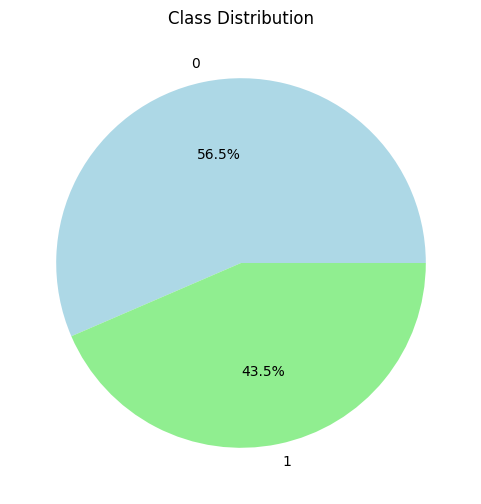

In [ ]:
import matplotlib.pyplot as plt

class_distribution = combined_df['label'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Class Distribution')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# Tokenize and create TF-IDF vectors for the 'text' column of the combined dataset
tfidf_vectors = tfidf_vectorizer.fit_transform(combined_df['text'])

# Convert TF-IDF vectors to a DataFrame for easy analysis
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())

    00  000   01   10  100   11  114  118   12   13  ...  younger      your  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0  0.035183   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0  0.000000   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0  0.082146   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0  0.000000   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0  0.142318   

   yours  yourself  youth  youtube  zero  zip  zone  zones  
0    0.0  0.063647    0.0      0.0   0.0  0.0   0.0    0.0  
1    0.0  0.000000    0.0      0.0   0.0  0.0   0.0    0.0  
2    0.0  0.037152    0.0      0.0   0.0  0.0   0.0    0.0  
3    0.0  0.000000    0.0      0.0   0.0  0.0   0.0    0.0  
4    0.0  0.000000    0.0      0.0   0.0  0.0   0.0    0.0  

[5 rows x 5000 columns]


In [ ]:
X = tfidf_df.values
y = combined_df['label'].values

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation = 'relu'),
    Dropout(0.3),
    Dense(1, activation = 'sigmoid')
])

#compile the model
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train_encoded, epochs = 10, batch_size = 32, validation_data = (X_test, y_test_encoded), verbose = 1)

Epoch 1/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8696 - loss: 0.2674 - val_accuracy: 0.9607 - val_loss: 0.1006
Epoch 2/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9786 - loss: 0.0583 - val_accuracy: 0.9583 - val_loss: 0.1104
Epoch 3/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9921 - loss: 0.0258 - val_accuracy: 0.9623 - val_loss: 0.1180
Epoch 4/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9967 - loss: 0.0107 - val_accuracy: 0.9642 - val_loss: 0.1348
Epoch 5/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.9642 - val_loss: 0.1678
Epoch 6/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9988 - loss: 0.0035 - val_accuracy: 0.9657 - val_loss: 0.1730
Epoch 7/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9990 - loss: 0.0034 - val_accuracy: 0.9643 - val_loss: 0.2015
Epoch 8/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9998 - loss: 9.4304e-0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    X_train, y_train_encoded,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8907 - loss: 0.2666 - val_accuracy: 0.9545 - val_loss: 0.1106
Epoch 2/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9779 - loss: 0.0612 - val_accuracy: 0.9608 - val_loss: 0.1038
Epoch 3/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9911 - loss: 0.0264 - val_accuracy: 0.9581 - val_loss: 0.1309
Epoch 4/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9956 - loss: 0.0139 - val_accuracy: 0.9611 - val_loss: 0.1529


In [ ]:
#predict probabilities for the test set
y_pred_prob = model.predict(X_test)


# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)


# Calculate and print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))


# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4262
           1       0.95      0.96      0.96      3298

    accuracy                           0.96      7560
   macro avg       0.96      0.96      0.96      7560
weighted avg       0.96      0.96      0.96      7560

ROC-AUC Score: 0.9941


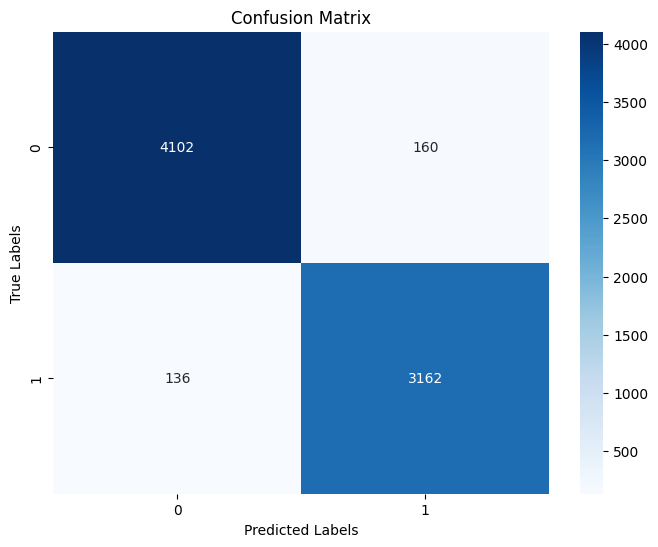

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import pickle

# Save the TF-IDF tokenizer
with open('tfidf_tokenizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Save the trained model
model.save('AIvsHUMAN.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
with open('tfidf_tokenizer.pkl', 'rb') as f:
    tfidf_tokenizer = pickle.load(f)

# Load the trained model
loaded_model = load_model('/content/AIvsHUMAN.h5')

# Function to preprocess text and make predictions
def predict_outcome(text):
    # Preprocess the text using the loaded tokenizer
    text_features = tfidf_tokenizer.transform([text])

    # Make predictions using the loaded model
    predictions = loaded_model.predict(text_features)
    confidence = float(predictions[0][0])
    # Return the predicted outcome (1 for positive, 0 for negative)
    return int(predictions[0][0]),confidence

In [ ]:
input_text="Superb Watch Under This price Range.......Value for Money..... having nice or bright Display in outdoors..... Like this  Product"

In [ ]:
predicted_label, = predict_outcome(input_text)

print("Predicted Label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Predicted Label: 0


In [ ]:
label, confidence = predict_outcome(input_text)

print(f"Predicted Label: {label}")
print(f"Confidence: {confidence:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Predicted Label: 0
Confidence: 0.2860
